Loading required packages

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import time

Loading the data from cifar10 dataset

In [ ]:
train = torchvision.datasets.CIFAR10('./data', train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = torchvision.datasets.CIFAR10('./data', train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=16, shuffle=False)

100%|██████████| 170498071/170498071 [00:13<00:00, 12885263.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Defining the network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.CIFAR = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 512 x 2 x 2
            nn.BatchNorm2d(512),

            nn.Flatten(), 
            nn.Linear(512*2*2, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, x):
        x = self.CIFAR(x)
        return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
print(net)
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.00007, amsgrad = True)

Net(
  (CIFAR): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
loss_arr = []
for epoch in range(30): 
  for data in trainset:  
      X, y = data
      X = X.to(device)
      y = y.to(device) 
      net.zero_grad()  
      output = net(X)  
      loss = loss_criterion(output, y)  

      # Backpropergation 
      loss.backward()  
      optimizer.step()  
  print(loss) 
  loss_arr.append(loss.item())

tensor(0.6754, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3747, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1131, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1691, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=

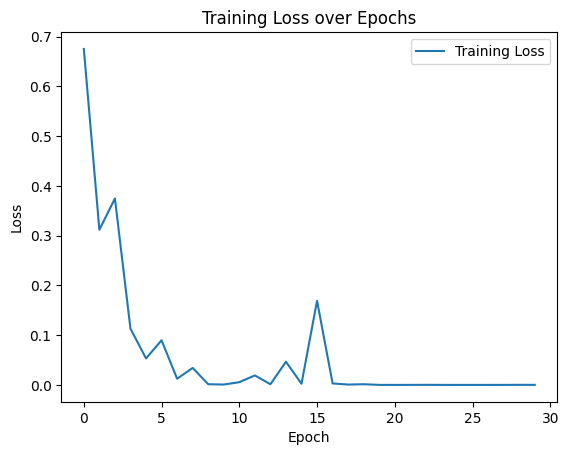

In [ ]:
plt.plot(loss_arr, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        X = X.to(device)
        y = y.to(device)
        output = net(X)
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.82
